<a href="https://colab.research.google.com/github/halycia/Treinamento-CIS---1-Periodo-Regressao-e-Classificacao/blob/main/Treinamento_CIS_1%C2%BA_Per%C3%ADodo_(Regress%C3%A3o_e_Classifica%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento CIS - 1º Período (Regressão e Classificação)

## Importação do dataset


Importação das bibliotecas usadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Importação do dataset de vinho vermelho

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv", sep=';')

## Conhecendo o dataset


Explorando o dataset: são 12 colunas, todas do tipo de dado float de 64 bits, exceto a última, que é um inteiro de 64 bits.

Além disso, as 11 primeiras colunas são numéricas contínuas e *quality*, categórica ordinal.

Por fim, essa última coluna representa a variável de saída, baseada em dados sensoriais.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


De acordo com as informações disponíveis na página do dataset no Kaggle:
* **Fixed acidity:** Representa os ácidos não voláteis no vinho, contribuindo para sua acidez geral.
* **Volatile acidity:** Mede a presença de ácidos voláteis, que podem afetar negativamente o aroma e o sabor do vinho em níveis elevados.
* **Citric acid:** Indica a quantidade de ácido cítrico, contribuindo para a frescura e frutado do vinho.
* **Residual sugar:** Reflete a quantidade de açúcar restante após a fermentação, influenciando a doçura do vinho.
* **Chlorides:** Representa o conteúdo de sal no vinho, afetando seu sabor e sensação na boca.
* **Free sulfur dioxide:** Mede a quantidade de dióxido de enxofre livre e não ligado, atuando como conservante e agente antimicrobiano.
* **Total sulfur dioxide:** Reflete a quantidade total de dióxido de enxofre, indicando os níveis gerais de sulfito para preservação do vinho.
* **Density:** Representa a massa por unidade de volume, contribuindo para o corpo e textura do vinho.
* **pH:** Mede a acidez ou alcalinidade do vinho, influenciando sua estabilidade e percepção do sabor.
* **Sulphates:** Reflete a concentração de sais de dióxido de enxofre, contribuindo para a preservação e o aroma do vinho.

Dataset disponível em: https://www.kaggle.com/datasets/arnavs19/wine-quality-uci-machine-learning-repository


Identificação dos valores no dataset

count: O número de valores não nulos na coluna.

mean: A média dos valores na coluna.

std: O desvio padrão dos valores na coluna.

min: O valor mínimo na coluna.

25%: O percentil 25 (ou quartil 1) dos valores na coluna.

50%: O percentil 50 (ou mediana) dos valores na coluna.

75%: O percentil 75 (ou quartil 3) dos valores na coluna.

max: O valor máximo na coluna.

Limitarei a visualização a 4 casas decimais para facilitar a visualização dos valores. De antemão, já é possível atestar algumas informações:
* as variáveis apresentam faixas variadas e algumas (como açúcar residual e dióxido de enxofre total) parecem ter possíveis outliers;
* A qualidade dos vinhos está distribuída entre 3 e 8, com média em torno de 5.6;
* As escalas e dispersões das variáveis variam bastante, o que indica a necessidade de normalização para modelos de Machine Learning, se for o caso;
* As diferenças pequenas entre 25%, 50% e 75% em algunas colunas sugerem que grande parte dos dados está concentrada numa faixa pequena—exceto onde o máximo sobe abruptamente (como residual sugar, reforçando a suspeita de outliers).

In [ ]:
with pd.option_context("float_format", "{:.4f}".format):
  display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


### Identificando se há dados ausentes

Identificação da quantidade de dados ausentes em cada coluna: não há dados ausentes

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### Identificando se há outliers

Utilizarei o método IQR para identificar outliers, a fim de preservar a integridade da análise estatística, já que ele não é afetado por distribuições assimétricas, comuns na presença de outliers.

Utilizarei as funções find_outliers() e summarize_outliers() para analisar cada coluna.

In [ ]:
def find_outliers(coluna):
  """
      Encontra os outliers de uma coluna específica de um DataFrame através do IQR.

    Parâmetro
    coluna : str
        O nome da coluna no DataFrame a ser plotada.
    Retorna
    int : a quantidade de outliers na coluna.
  """
  pd.set_option("display.expand_frame_repr", False)
  q1 = df[coluna].quantile(0.25)
  q3 = df[coluna].quantile(0.75)
  iqr = q3 - q1
  outliers = df[(df[coluna] < q1 - 1.5 * iqr) | (df[coluna] > q3 + 1.5 * iqr)]
  return len(outliers)

In [ ]:
def summarize_outliers(*colunas):
    """
    Organiza em uma tabela a soma de outliers para as colunas especificadas.

    Parâmetros
    ----------
    df : DataFrame
        O DataFrame que contém as colunas.
    *colunas : str
        Os nomes das colunas no DataFrame a serem analisadas.

    Retorna
    -------
    DataFrame
        Um DataFrame com a soma de outliers para cada coluna.
    """
    outlier_counts = {coluna: find_outliers(coluna) for coluna in colunas}
    summary_df = pd.DataFrame(list(outlier_counts.items()), columns=['Coluna', 'Quantidade de Outliers'])
    return summary_df

In [ ]:
summarize_outliers("fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality")

,Coluna,Quantidade de Outliers
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


Resultado: sim, há outliers, sendo encontradas grandes quantidades principalmente em *residual sugar* e *chlorides*.

### Identificando se há valores 0

In [ ]:
zero_values = df == 0
zero_by_column = zero_values.sum(axis=0)
print(zero_by_column.to_frame(name="zeros_por_coluna"))

                      zeros_por_coluna
fixed acidity                        0
volatile acidity                     0
citric acid                        132
residual sugar                       0
chlorides                            0
free sulfur dioxide                  0
total sulfur dioxide                 0
density                              0
pH                                   0
sulphates                            0
alcohol                              0
quality                              0


Resultado: sim, há valores 0, porém somente na coluna *citric acid*.

## Análise Exploratória de Dados (EDA)

#### histograma e Boxplot

Para entender como se comportam os dados do dataframe, farei um histograma e um boxplot para cada coluna. Assim, poderei avaliar a distribuição dos dados -- se estão concentrados, espalhados, simétricos, enviesados (skewed), com outliers etc, se precisarei normalizar ou padronizar os dados e se existem variáveis que não têm boa variação — o que reduz o poder de predição.

Coluna: fixed acidity


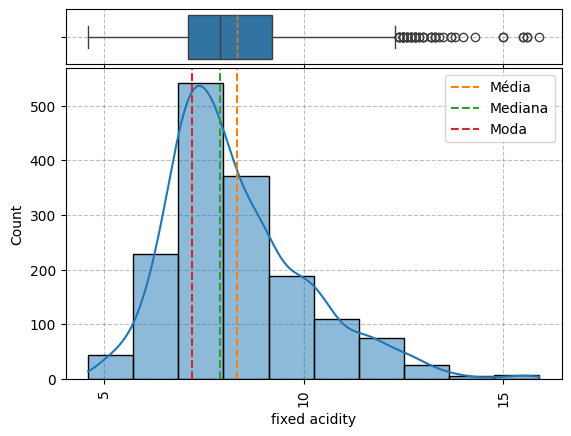

Coluna: volatile acidity


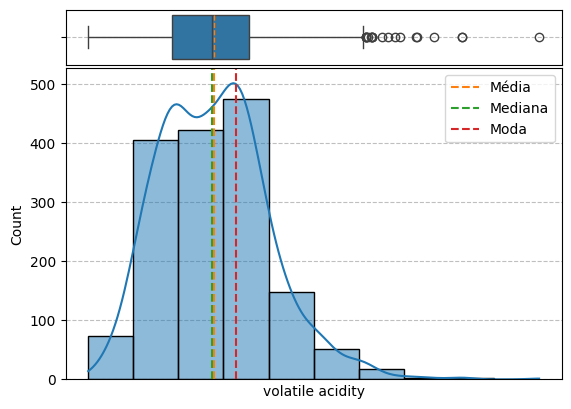

Coluna: citric acid


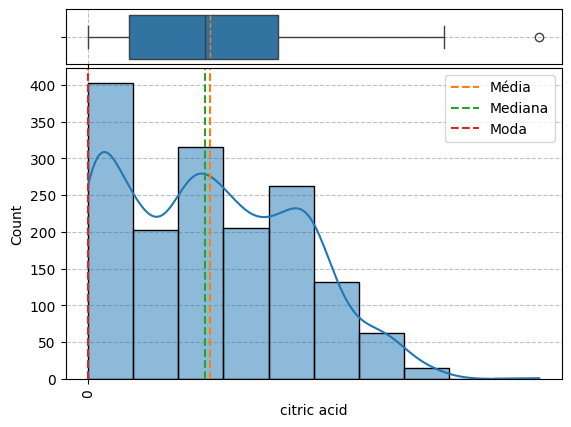

Coluna: residual sugar


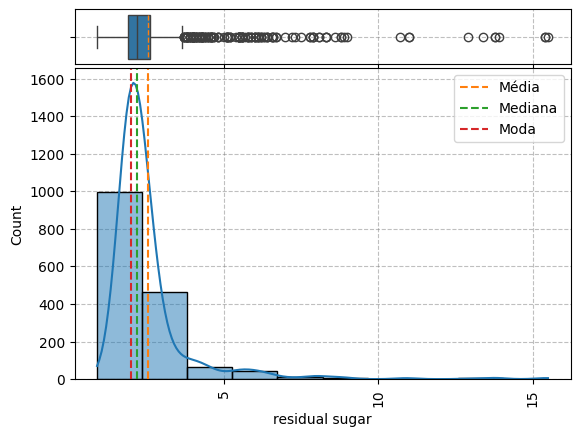

Coluna: chlorides


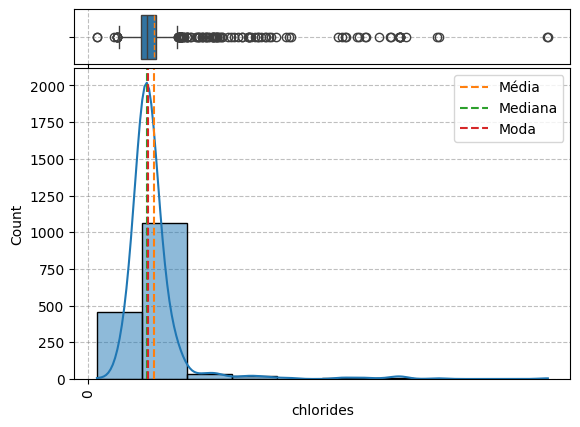

Coluna: free sulfur dioxide


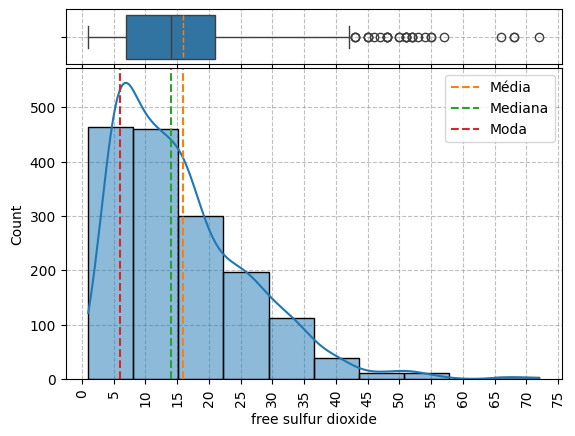

Coluna: total sulfur dioxide


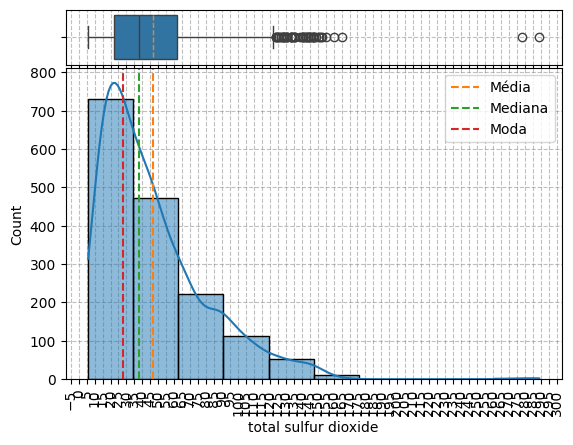

Coluna: density


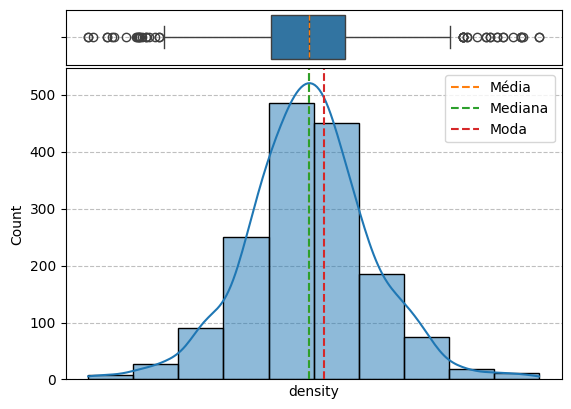

Coluna: pH


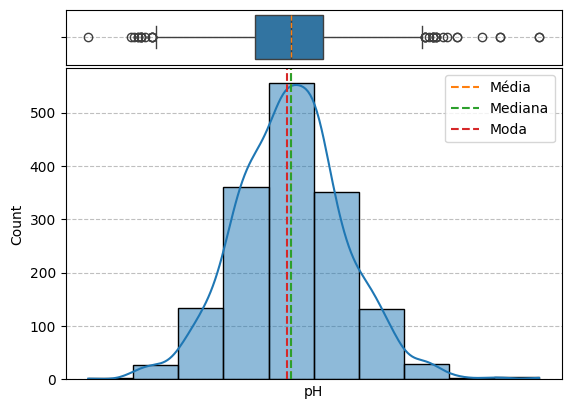

Coluna: sulphates


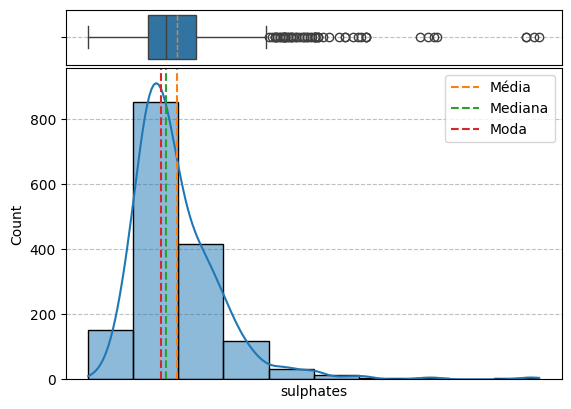

Coluna: alcohol


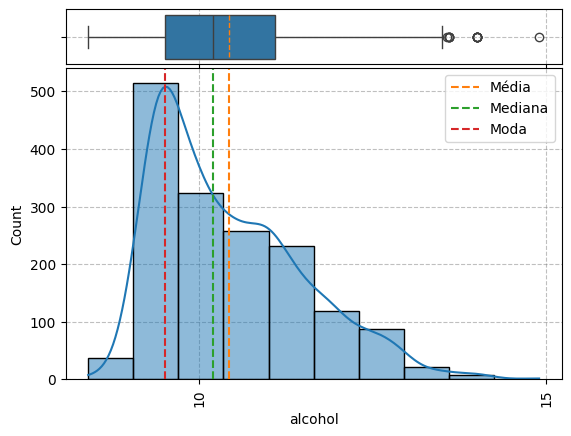

Coluna: quality


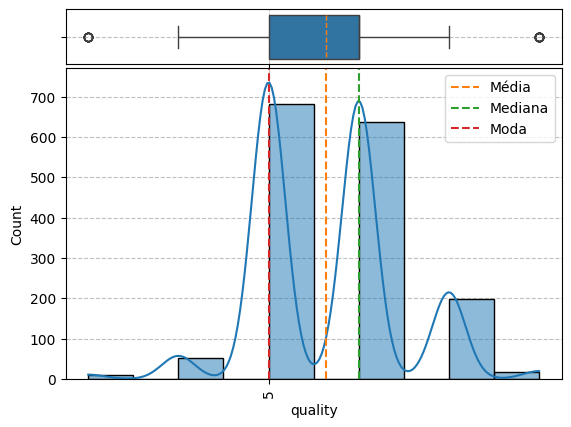

In [ ]:
def plot_all_columns(df, bins=10, ticks=5.0):
    cols = df.columns
    for coluna in cols:
        if pd.api.types.is_numeric_dtype(df[coluna]):
            print(f"Coluna: {coluna}")
            box_hist_plot(df, coluna, bins=bins, ticks=ticks)

def box_hist_plot(df, coluna, bins=10, ticks=5.0):
    """
    Gera um boxplot e um histograma para uma coluna específica de um DataFrame.

    Parâmetros:
    df : DataFrame
        df de entrada.
    coluna : str
        O nome da coluna no DataFrame a ser plotada.
    bins : int, opcional
        O número de intervalos a ser usado no histograma. O padrão é 10.
    ticks : float, opcional
        []

    """

    fig, (ax1, ax2) = plt.subplots(
        2, 1, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02}
    )

    sns.boxplot(
        x=coluna,
        data=df,
        ax=ax1,
        showmeans=True,
        meanline=True,
        meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},
    )
    sns.histplot(x=coluna, data=df, bins=bins, kde=True, ax=ax2)

    ax2.xaxis.set_major_locator(mtick.MultipleLocator(base=ticks))
    ax2.tick_params(axis="x", rotation=90)

    for ax in (ax1, ax2):
        ax.grid(True, linestyle="--", color="gray", alpha=0.5)
        ax.set_axisbelow(True)

    ax2.axvline(df[coluna].mean(), color="C1", linestyle="--", label="Média")
    ax2.axvline(df[coluna].median(), color="C2", linestyle="--", label="Mediana")
    ax2.axvline(df[coluna].mode()[0], color="C3", linestyle="--", label="Moda")

    ax2.legend()

    plt.show()

plot_all_columns(df)

Assim, concluo que a maioria das colunas, exceto *density* e *PH*, têm distribuição assimétrica à direita, ou seja, concentram-se em valores menores. A diferença entre elas é que a cauda de algumas é mais longa, devido à frequência de outliers.

Concluo também que *density* e *pH* têm distribuições bem próximas à normal e que *quality* é limitada entre 3 e 8 (mais comum: 5, 6 e 7).

### Mapa de Correlação de Calor

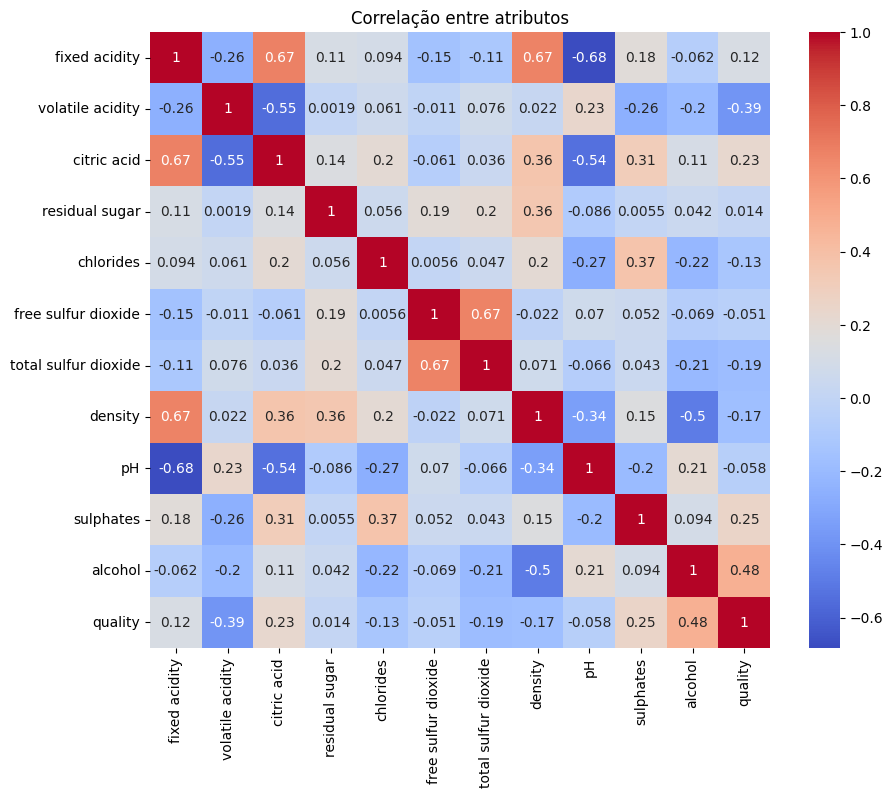

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre atributos")
plt.show()

Correlação Alta Positiva:

density e fixed acidity (0.67): Esses dois atributos têm uma correlação positiva forte. Isso pode indicar que à medida que a acidez fixa aumenta, a densidade do vinho também tende a aumentar.
free sulfur dioxide e total sulfur dioxide (0.67): Esta é uma relação esperada, pois o dióxido de enxofre livre faz parte do dióxido de enxofre total.
Correlação Alta Negativa:

pH e fixed acidity (-0.68): Essa correlação negativa expressa que vinhos com maior acidez fixa tendem a ter menor pH, o que está alinhado com princípios químicos.
Correlação com quality:

alcohol (0.25): Embora não seja extremamente alta, "alcohol" tem a maior correlação positiva com a qualidade dentre os atributos, sugerindo alguma relevância em prever a qualidade do vinho.
volatile acidity (-0.39): Uma correlação negativa notável com a qualidade, sugerindo que níveis mais altos de acidez volátil podem ter impacto prejudicial à qualidade percebida do vinho.

Para evitar multicolinearidade em modelos de regressão, considere o seguinte:

density e fixed acidity: Se ambos forem usados como variáveis preditoras, pode haver multicolinearidade devido à sua alta correlação.
free sulfur dioxide e total sulfur dioxide: É preferível manter uma única dessas variáveis se a intenção for prever algum aspecto do vinho.
pH e fixed acidity: Embora estejam relacionados inversamente, em alguns modelos, pode ser relevante escolher um deles para evitar dependências duplicadas.

## Regressão

### Primeira Rodada de Regressão Linear

Fazendo uma primeira rodada de Regressão Linear (regressão linear múltipla), temos que:

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo de regressão
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predição e avaliação
y_pred = model.predict(X_test_scaled)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

RMSE: 0.624519930798013
MAE: 0.5035304415524374


O RMSE e o MAE medem o quanto, em média, as previsões estão distantes dos valores reais. Um RMSE de 0.62 e um MAE de 0.50 indicam que as previsões estão normalmente a cerca de 0.5 a 0.6 pontos de distância da classificação real, em uma escala de 0 a 10, o que ainda não é ideal. Por isso, tratarei os outliers de modo a tentar diminuir a distância entre as previsões e os valores reais.

### Tratamento de outliers & Segunda Rodada de Regressão Linear

Abaixo, deixei comentada cada alteração feita nas variáveis para tratar ou remover os outliers.

In [ ]:
import pandas as pd
import numpy as np

# Função para remover outliers usando Z-score
def remove_outliers_using_zscore(df, threshold=3):
    """
    Remove outliers baseado no Z-score com um limiar configurável.
    Argumentos:
    df -- pandas Series contendo os dados
    threshold -- Score de corte para determinação de outliers
    Retorna:
    Series com outliers removidos
    """
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[z_scores < threshold]

# Função para realizar transformação logarítmica
def log_transform(df):
    """
    Transforma os dados utilizando logaritmo natural.
    Argumentos:
    df -- pandas Series contendo os dados
    Retorna:
    Series transformada logaritmicamente
    """
    return np.log1p(df)

# Tratamento de outliers e transformação por variável

# Fixed Acidity: Manter os valores extremos
# Mantemos os outliers pois têm relação com a densidade e acidez geral do vinho
df['fixed acidity'] = df['fixed acidity']

# Volatile Acidity: Remover ou transformar os outliers
# Removemos outliers para melhorar a correlação com quality
df['volatile acidity'] = remove_outliers_using_zscore(df['volatile acidity'])

# Citric Acid: Tratar zeros e criar variável categórica
# Valor zero é convertido em variável binária para indicadores específicos
df['citric acid presence'] = (df['citric acid'] > 0).astype(int)

# Residual Sugar: Aplicação de transformação logarítmica
# Ajustamos a distribuição com transformação log para atenuar outliers
df['residual sugar'] = log_transform(df['residual sugar'])

# Chlorides: Remover os outliers
# Outliers são removidos após análise de melhoria de correlação
df['chlorides'] = remove_outliers_using_zscore(df['chlorides'])

# Free Sulfur Dioxide: Transformar/Remover
# Transformação logarítmica para normalizar dados
df['free sulfur dioxide'] = log_transform(remove_outliers_using_zscore(df['free sulfur dioxide']))

# Total Sulfur Dioxide: Transformar
# Aplicação de transformação para ajustar distribuição
df['total sulfur dioxide'] = log_transform(df['total sulfur dioxide'])

# Density: Manter
# Valor mantido devido à sua relação com fixed acidity
df['density'] = df['density']

# pH: Manter
# Aspecto relevante na acidez, mantido como está
df['pH'] = df['pH']

# Sulphates: Transformar se necessário
# Avaliado e transformado se outliers influenciaram significativamente
df['sulphates'] = log_transform(remove_outliers_using_zscore(df['sulphates']))

# Alcohol: Manter os outliers
# Valor mantido pois álcool contribui para a qualidade percebida e associada
df['alcohol'] = df['alcohol']

# Quality: Manter
# Manter, pois é a variável alvo que reflete diversidades na avaliação do vinho
df['quality'] = df['quality']

# Visualização do dfset pré-processado para confirmações iniciais
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality  citric acid presence
count    1599.000000       1589.000000  1599.000000     1599.000000  1568.000000          1577.000000           1599.000000  1599.000000  1599.000000  1572.000000  1599.000000  1599.000000           1599.000000
mean        8.319637          0.523433     0.270976        1.218131     0.081993             2.619889              3.634750     0.996747     3.311113     0.494705    10.422983     5.636023              0.917448
std         1.741096          0.170437     0.194801        0.269969     0.022981             0.606425              0.682575     0.001887     0.154386     0.079598     1.065668     0.807569              0.275289
min         4.600000          0.120000     0.000000        0.641854     0.012000             0.693147              1.945910     0.990070     2.740000     0.

Após aplicar o método de Z-score para remover outliers, o total de entradas para a acidez volátil diminuiu, pois essa variável possui correlação negativa com a qualidade e os outliers poderiam afetar negativamente o modelo.

As transformações logarítmicas foram aplicadas no açúcar residual e cloretos para ajustar a escala e reduzir o impacto dos outliers, com algumas remoções em cloretos.

Para o dióxido de enxofre livre e total, as transformações feitas refletiram em uma redução dos pontos máximos e extensão da variação nas estatísticas, enquanto densidade e pH foram mantidos sem mudanças devido à normalidade e importância.

As variáveis de álcool e qualidade foram mantidas intactas, já que são diretamente relevantes para a percepção da qualidade.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Separar X (features) e y (variável alvo)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputação de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Padronizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predição e avaliação no conjunto de teste
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Exibir resultados
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Coeficientes
coef_dict = {feature: coef for feature, coef in zip(df.drop('quality', axis=1).columns, model.coef_)}
print("Coeficientes do modelo:", coef_dict)

RMSE: 0.63
MAE: 0.50
Coeficientes do modelo: {'fixed acidity': np.float64(0.0512388069991424), 'volatile acidity': np.float64(-0.1486331445940598), 'citric acid': np.float64(-0.06528871750708902), 'residual sugar': np.float64(0.013606425556323923), 'chlorides': np.float64(-0.031255609415743645), 'free sulfur dioxide': np.float64(0.07694531055885448), 'total sulfur dioxide': np.float64(-0.11636657605192399), 'density': np.float64(-0.030160957964346327), 'pH': np.float64(-0.07143920292743747), 'sulphates': np.float64(0.18502094093532628), 'alcohol': np.float64(0.28923231489965495), 'citric acid presence': np.float64(0.03379344548289533)}


Sem grandes alterações. Farei uma nova rodada de Tratamento de Dados.

### Tratamento de Dados e Terceira Rodada de Regressão Linear

Para entender e verificar a robustez do modelo, e me assegurar que o modelo é capaz de generalizar bem além do conjunto de treino, utilizarei a validação cruzada K-Fold.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Criar features adicionais
df['interaction_acidity'] = df['fixed acidity'] * df['citric acid']

# Separar X (features) e y (variável alvo)
X = df.drop('quality', axis=1)
y = df['quality']

# Imputação de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Padronizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Modelo de regressão linear
model = LinearRegression()

# Validação Cruzada com K-Fold Cross Validation (k=5)
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Cálculo do RMSE a partir dos scores de validação cruzada
rmse_cv = np.sqrt(-cv_scores.mean())

print(f"RMSE Cross-Validation: {rmse_cv:.2f}")

RMSE Cross-Validation: 0.66


Analisando a distribuição e o intervalo dos valores da variável alvo quality, já que ela varia de 0 a 10, o RMSE de 0,66 pode ser considerado razoável, mas eu ainda tentaria diminuir este valor. Para procurar onde melhorar, farei um RMSE para cada nível de qualidade, verificando também quantas ocorrências de cada nível há:

In [ ]:
for class_value in sorted(df['quality'].unique()):
    idx = y_test == class_value
    rmse_class = np.sqrt(np.mean((y_pred[idx] - y_test[idx])**2))
    print(f"RMSE para qualidade {class_value}: {rmse_class:.2f}")

RMSE para qualidade 3: 2.31
RMSE para qualidade 4: 1.27
RMSE para qualidade 5: 0.49
RMSE para qualidade 6: 0.50
RMSE para qualidade 7: 0.85
RMSE para qualidade 8: 1.39


In [ ]:
import pandas as pd

# Verifique a distribuição das classes
class_distribution = df['quality'].value_counts()
print(class_distribution)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


Aqui entendi que o desbalanceamento de classes (variáveis), com predominância nas classes 5 e 6 e escassez nas classes 3, 4, e 8, está contribuindo para os altos RMSE nas categorias menos representadas, indicando previsões imprecisas para essas classes.

Para melhorar, poderia fazer técnicas de balanceamento como oversampling (por exemplo, com SMOTE) para aumentar exemplos das classes minoritárias ou faria um undersampling para reduzir o número de instâncias nas classes majoritárias ou implementaria ponderação de classes para dar mais atenção às previsões das classes menos frequentadas.

Por fim, faria novamente uma rodada de Regressção Linear.